In [ ]:
pip install requests


In [ ]:
pip install firebase-admin


In [14]:
import requests
import json
from google.colab import files

def fetch_bike_stations(contract_name, api_key):
    url = f"https://api.jcdecaux.com/vls/v1/stations?contract={contract_name}&apiKey={api_key}"

    try:
        response = requests.get(url)
        response.raise_for_status()  # Will raise an HTTPError if the HTTP request returned an unsuccessful status code

        # Assuming the response is JSON and contains the data
        stations = response.json()
        return stations

    except requests.exceptions.HTTPError as err:
        print(f"HTTP Error: {err}")
    except requests.exceptions.RequestException as e:
        print(f"Error: {e}")

# Replace 'your_api_key' with your actual JCDecaux API key and 'Dublin' with your contract name
api_key = '8d5d907d7e3ef822f7aaed8c7040544def265d48'
contract_name = 'Dublin'

stations_data = fetch_bike_stations(contract_name, api_key)

# Print the fetched data
print(stations_data)


[{'number': 42, 'contract_name': 'dublin', 'name': 'SMITHFIELD NORTH', 'address': 'Smithfield North', 'position': {'lat': 53.349562, 'lng': -6.278198}, 'banking': False, 'bonus': False, 'bike_stands': 30, 'available_bike_stands': 17, 'available_bikes': 13, 'status': 'OPEN', 'last_update': 1701628037000}, {'number': 30, 'contract_name': 'dublin', 'name': 'PARNELL SQUARE NORTH', 'address': 'Parnell Square North', 'position': {'lat': 53.3537415547453, 'lng': -6.26530144781526}, 'banking': False, 'bonus': False, 'bike_stands': 20, 'available_bike_stands': 18, 'available_bikes': 2, 'status': 'OPEN', 'last_update': 1701627713000}, {'number': 54, 'contract_name': 'dublin', 'name': 'CLONMEL STREET', 'address': 'Clonmel Street', 'position': {'lat': 53.336021, 'lng': -6.26298}, 'banking': False, 'bonus': False, 'bike_stands': 33, 'available_bike_stands': 29, 'available_bikes': 4, 'status': 'OPEN', 'last_update': 1701628029000}, {'number': 108, 'contract_name': 'dublin', 'name': 'AVONDALE ROAD', 

In [15]:
filename = 'Dublin_CityBike.json'


In [16]:
# Write the JSON data to a file
with open(filename, 'w') as f:
    json.dump(stations_data, f)

# Download the file to your local machine
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score

In [22]:
df = pd.read_json('Dublin_CityBike.json','r',encoding='utf-8')
df.head()

<ipython-input-22-f3ac8a4932fe>:1: FutureWarning:

Starting with pandas version 2.0 all arguments of read_json except for the argument 'path_or_buf' will be keyword-only.



,number,contract_name,name,address,position,banking,bonus,bike_stands,available_bike_stands,available_bikes,status,last_update
0,42,dublin,SMITHFIELD NORTH,Smithfield North,"{'lat': 53.349562, 'lng': -6.278198}",False,False,30,17,13,OPEN,1701628037000
1,30,dublin,PARNELL SQUARE NORTH,Parnell Square North,"{'lat': 53.3537415547453, 'lng': -6.2653014478...",False,False,20,18,2,OPEN,1701627713000
2,54,dublin,CLONMEL STREET,Clonmel Street,"{'lat': 53.336021, 'lng': -6.26298}",False,False,33,29,4,OPEN,1701628029000
3,108,dublin,AVONDALE ROAD,Avondale Road,"{'lat': 53.359405, 'lng': -6.276142}",False,False,35,26,9,OPEN,1701627924000
4,20,dublin,JAMES STREET EAST,James Street East,"{'lat': 53.336597, 'lng': -6.248109}",False,False,30,29,1,OPEN,1701628044000


In [23]:
df.shape


(114, 12)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



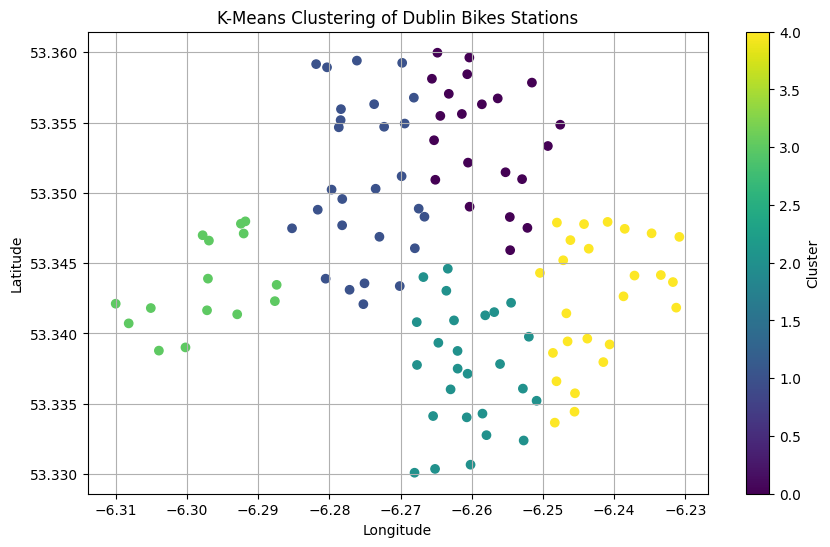

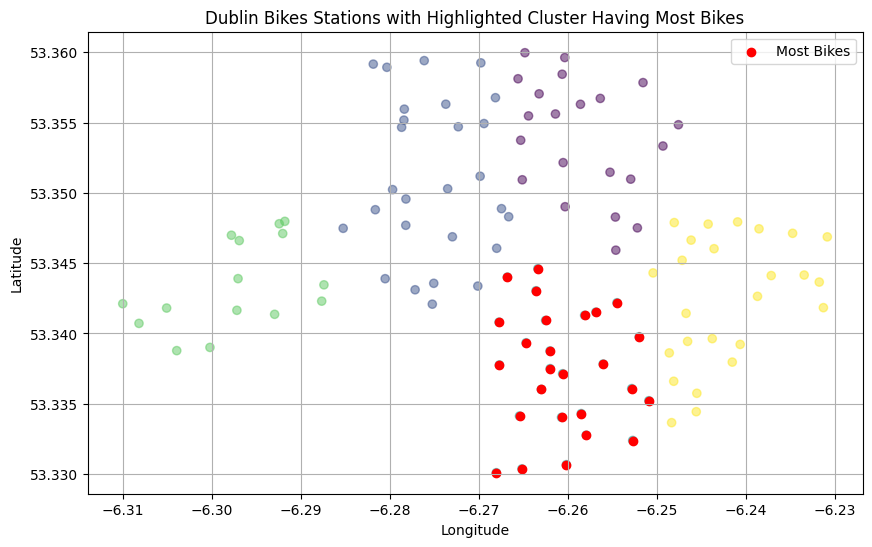

In [25]:
import json
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the Dublin CityBike JSON data
file_path = 'Dublin_CityBike.json'
with open(file_path, 'r') as file:
    dublin_bike_data = json.load(file)

# Extracting latitude, longitude, and available bikes
locations = [(station['position']['lat'], station['position']['lng'], station['available_bikes']) for station in dublin_bike_data]
df = pd.DataFrame(locations, columns=['Latitude', 'Longitude', 'Available_Bikes'])

# Perform K-means clustering
kmeans = KMeans(n_clusters=5)
df['Cluster'] = kmeans.fit_predict(df[['Latitude', 'Longitude']])

# Group by cluster and sum the available bikes
cluster_bikes = df.groupby('Cluster')['Available_Bikes'].sum().reset_index()

# Finding the cluster with the most bikes
max_bikes_cluster = cluster_bikes[cluster_bikes['Available_Bikes'] == cluster_bikes['Available_Bikes'].max()]
max_bikes_cluster_id = max_bikes_cluster['Cluster'].values[0]

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Dublin Bikes Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Highlight the cluster with the most bikes on the map
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(df[df['Cluster'] == max_bikes_cluster_id]['Longitude'],
            df[df['Cluster'] == max_bikes_cluster_id]['Latitude'],
            c='red', label='Most Bikes')
plt.title('Dublin Bikes Stations with Highlighted Cluster Having Most Bikes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

## Performed a K-means clustering analysis on the Dublin CityBike stations data using their latitude and longitude. The stations have been grouped into five clusters, as shown in the map.

## The cluster with the most available bikes is in red on the second map below. This visualization helps to identify the area in Dublin where the highest number of available bikes is concentrated.

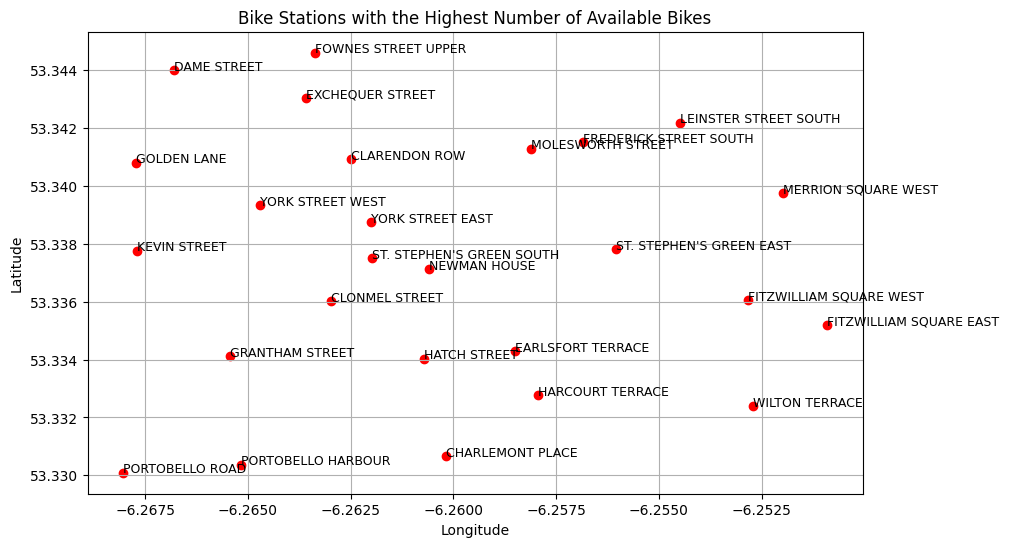

['CLONMEL STREET',
 'GRANTHAM STREET',
 'YORK STREET EAST',
 'FITZWILLIAM SQUARE WEST',
 'PORTOBELLO ROAD',
 'FREDERICK STREET SOUTH',
 'FOWNES STREET UPPER',
 'CLARENDON ROW',
 'EARLSFORT TERRACE',
 'GOLDEN LANE',
 'EXCHEQUER STREET',
 'HATCH STREET',
 'CHARLEMONT PLACE',
 'NEWMAN HOUSE',
 'MOLESWORTH STREET',
 'KEVIN STREET',
 'YORK STREET WEST',
 "ST. STEPHEN'S GREEN SOUTH",
 "ST. STEPHEN'S GREEN EAST",
 'PORTOBELLO HARBOUR',
 'MERRION SQUARE WEST',
 'DAME STREET',
 'FITZWILLIAM SQUARE EAST',
 'HARCOURT TERRACE',
 'WILTON TERRACE',
 'LEINSTER STREET SOUTH']

In [26]:
# Extracting the names and locations of the bike stations in the cluster with the most available bikes
stations_max_bikes = df[df['Cluster'] == max_bikes_cluster_id]
station_names_max_bikes = [dublin_bike_data[i]['name'] for i in stations_max_bikes.index]

# Plotting these stations
plt.figure(figsize=(10, 6))
for index, row in stations_max_bikes.iterrows():
    plt.scatter(row['Longitude'], row['Latitude'], c='red')
    plt.text(row['Longitude'], row['Latitude'], dublin_bike_data[index]['name'], fontsize=9)
plt.title('Bike Stations with the Highest Number of Available Bikes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

station_names_max_bikes